<a href="https://colab.research.google.com/github/not-Bartek/Logistic-Regression/blob/main/Logistic_Regression_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression:


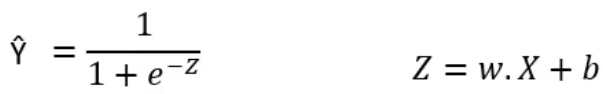

X_hat -> predicted value


X -> independent Variable


w -> weight


b -> bias

**Gradient Descent**

w = w - a*dw

b = b - a*db



**Learning**

Learning rate is a tuning parameter in an optimization algorithm tha determines the step size at each iteration while moving toward a minimum of a loss function

**Derivatives**

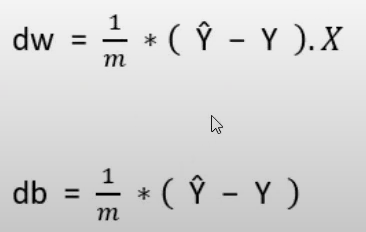

Importing the Dependencies

In [40]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [69]:
class Logistic_Regression():

  def __init__(self, learning_rate, no_of_iterations):
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self, X, Y):


    self.m , self.n = X.shape

    self.w = np.zeros(self.n)
    self.b = 0
    self.X = X
    self.Y = Y

    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    predicted_Y = 1/(1+np.exp(- (self.X.dot(self.w) + self.b)))
    dw = (1/self.m) * self.X.T.dot(predicted_Y - self.Y)
    db = (1/self.m) * np.sum(predicted_Y - self.Y)

    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  def predict(self, X):
    predict = 1/(1+np.exp(- (X.dot(self.w) + self.b)))

    return np.where( predict > 0.5, 1, 0)

In [70]:
diabetes_data = pd.read_csv('diabetes.csv')

In [71]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [72]:
X = diabetes_data.drop(['Outcome'],axis = 1)
Y = diabetes_data['Outcome']

In [73]:
scaler = StandardScaler()

In [74]:
scaler.fit(X)

StandardScaler()

In [75]:
standarized_data = scaler.transform(X)

In [76]:
X = standarized_data

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y)

In [78]:
model = Logistic_Regression(0.02, 1000)

In [91]:
model.fit(X_train, Y_train)
from sklearn.metrics import accuracy_score

In [92]:
test_predict = model.predict(X_test)
accuracy_score = accuracy_score(test_predict, Y_test)

In [93]:
print(accuracy_score)

0.7705627705627706
